## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path='./motorbike_ambulance_calls.csv')

In [4]:
print("Статистична інформація:")
data.describe()

Статистична інформація:


,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [5]:
print("Мінімальні значення:")
display(data.min())

print("\nМаксимальні значення:")
display(data.max())

Мінімальні значення:


index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object


Максимальні значення:


index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [6]:
print(f"Розмір датасету: {data.shape}")

Розмір датасету: (17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [7]:
print("Інформація по кожній змінній:\n")
data.info()

Інформація по кожній змінній:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [8]:
print("Пропуски:\n")
data.isnull().sum()

Пропуски:



index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1.  Розмірність датасету становить 17379, 15.

2.  Перевірили кількість даних по кожній змінній. 9 - int, 4 - float, 2 - object.

3.  Перевірили усі змінні на наявність пропусків. Виявилось що наш датасет не містить пропусків.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [9]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
data = tranform_date(data.copy(), 'date')

display(data.head(3))

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [10]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()

  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, "date")

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Ми перевели змінну date у datetype, зробивши йогоо коректним для нашого датасету. Ми визначили перший та останній день у записах. Також можна побачити що до перетворення максимальне значення дати виводилось неправильно (було 9/9/12, стало 31/12/12)

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [11]:
data_categorical = data.drop(["index", "date", "temp", "atemp", "hum", "windspeed"], axis="columns")
display(data_categorical.head(3))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,spring,0,1,0,0,6,0,1,16
1,spring,0,1,1,0,6,0,1,40
2,spring,0,1,2,0,6,0,1,32


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [12]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
  df[season_col_name] = df[season_col_name].map(season)
  return df
  
data_categorical = encode_season(data_categorical, "season")
display(data_categorical.head(3))

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,0,6,0,1,16
1,1,0,1,1,0,6,0,1,40
2,1,0,1,2,0,6,0,1,32


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

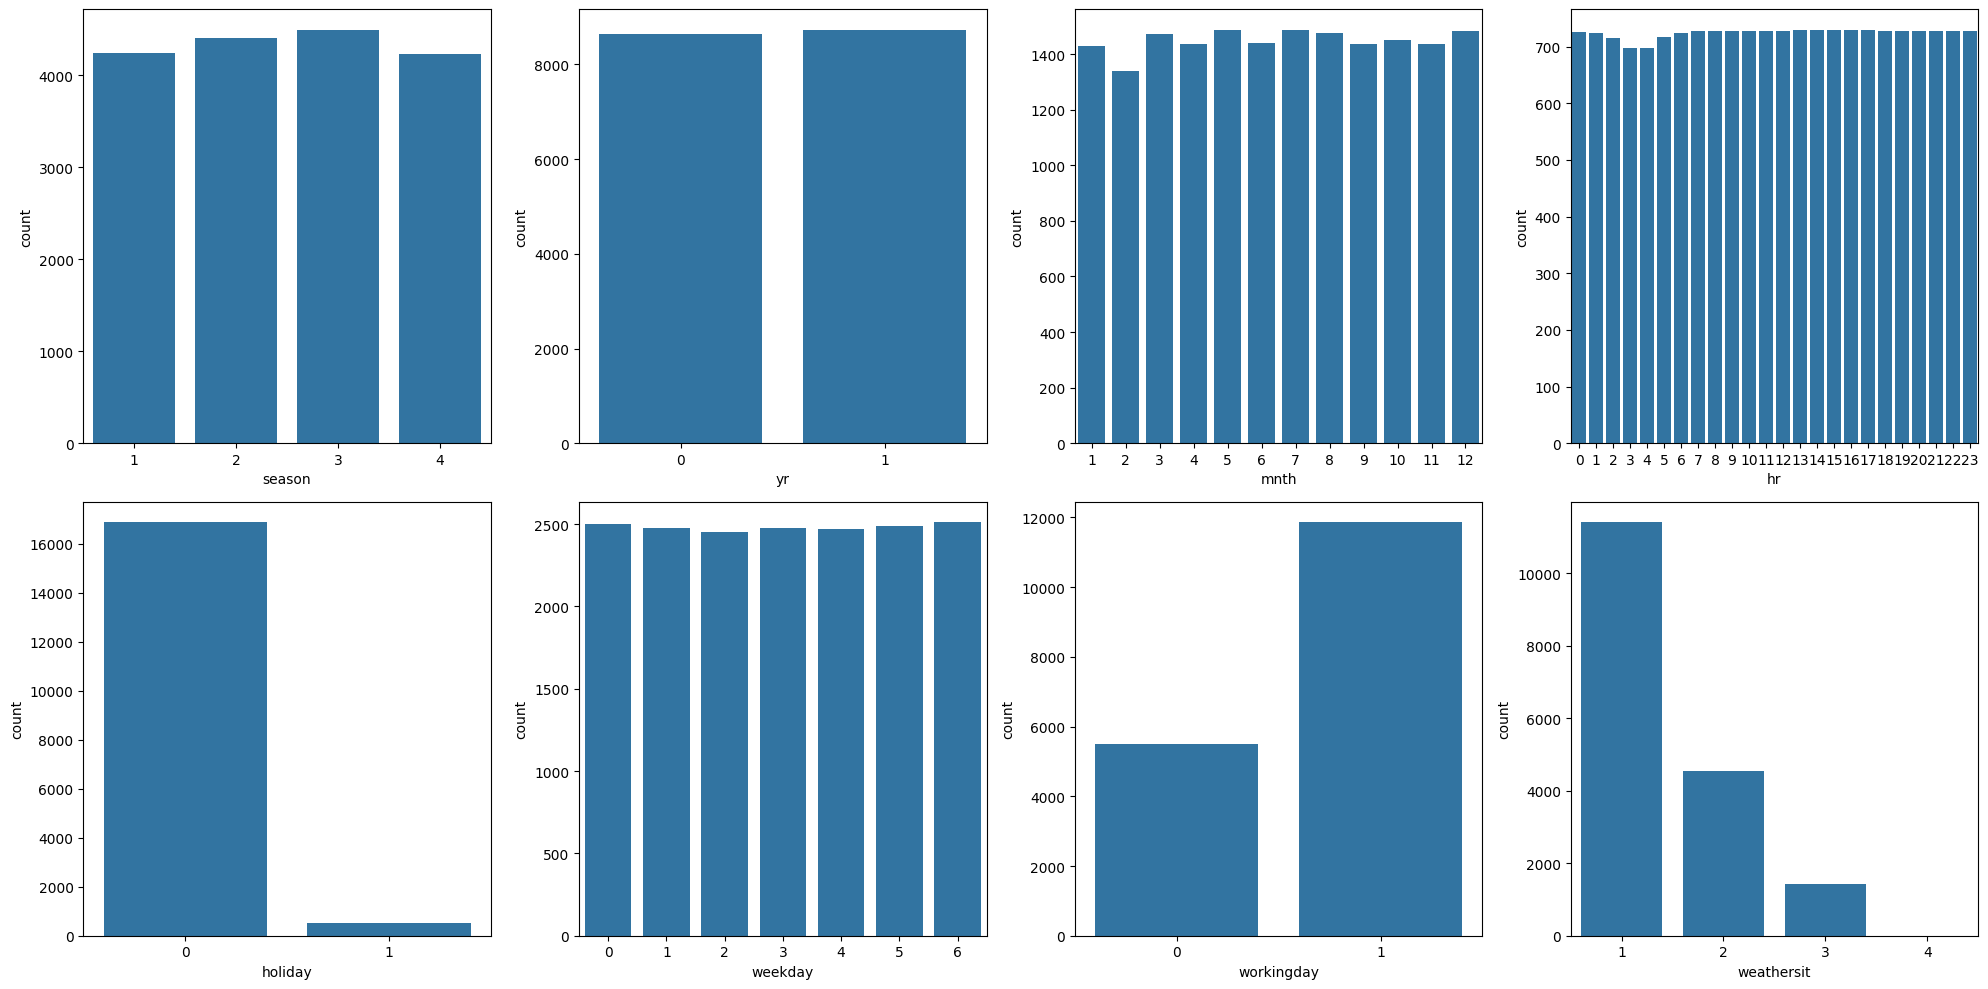

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot)

plt.tight_layout()  
plt.show()

**Висновки з 5-7 завдання (детальні)**



1.   Виділили категоріальні змінні ("index", "date", "temp", "atemp", "hum", "windspeed") в окремий датасет, щоб не втратити їх.

2.   Змінна season буде важлива в подальшому, тому ми перетворили її в числову шкалу.

3.   Побудували графік по усім категоріальним змінним. Щодо перших 4 (сезон, рік, місяць, година) та weekday можемо побачити що записи там доволі рівномірні. 

holiday показує кількість записів протягом святкових(1) та звичайних днів(0). можемо побачити, що записів у свята доволі мало.

working day показує записи за вихідні та робочі дні. ми бачимо що у робочі дні записів значно більше ніж у вихідні.

weathersit відповідає за погоду. 1 - хороша погода, 4 - дуже погана. Тут можна побачити, що дуже поганої погоди не було. Найбільший показник у колонці 1.



**Завдання 8** виділити числові змінні в окремий датасет

In [14]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
data_numerical

,temp,hum,windspeed,atemp,cnt
0,0.24,0.81,0.0000,0.2879,16
1,0.22,0.80,0.0000,0.2727,40
2,0.22,0.80,0.0000,0.2727,32
3,0.24,0.75,0.0000,0.2879,13
4,0.24,0.75,0.0000,0.2879,1
...,...,...,...,...,...
17374,0.26,0.60,0.1642,0.2576,119
17375,0.26,0.60,0.1642,0.2576,89
17376,0.26,0.60,0.1642,0.2576,90
17377,0.26,0.56,0.1343,0.2727,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

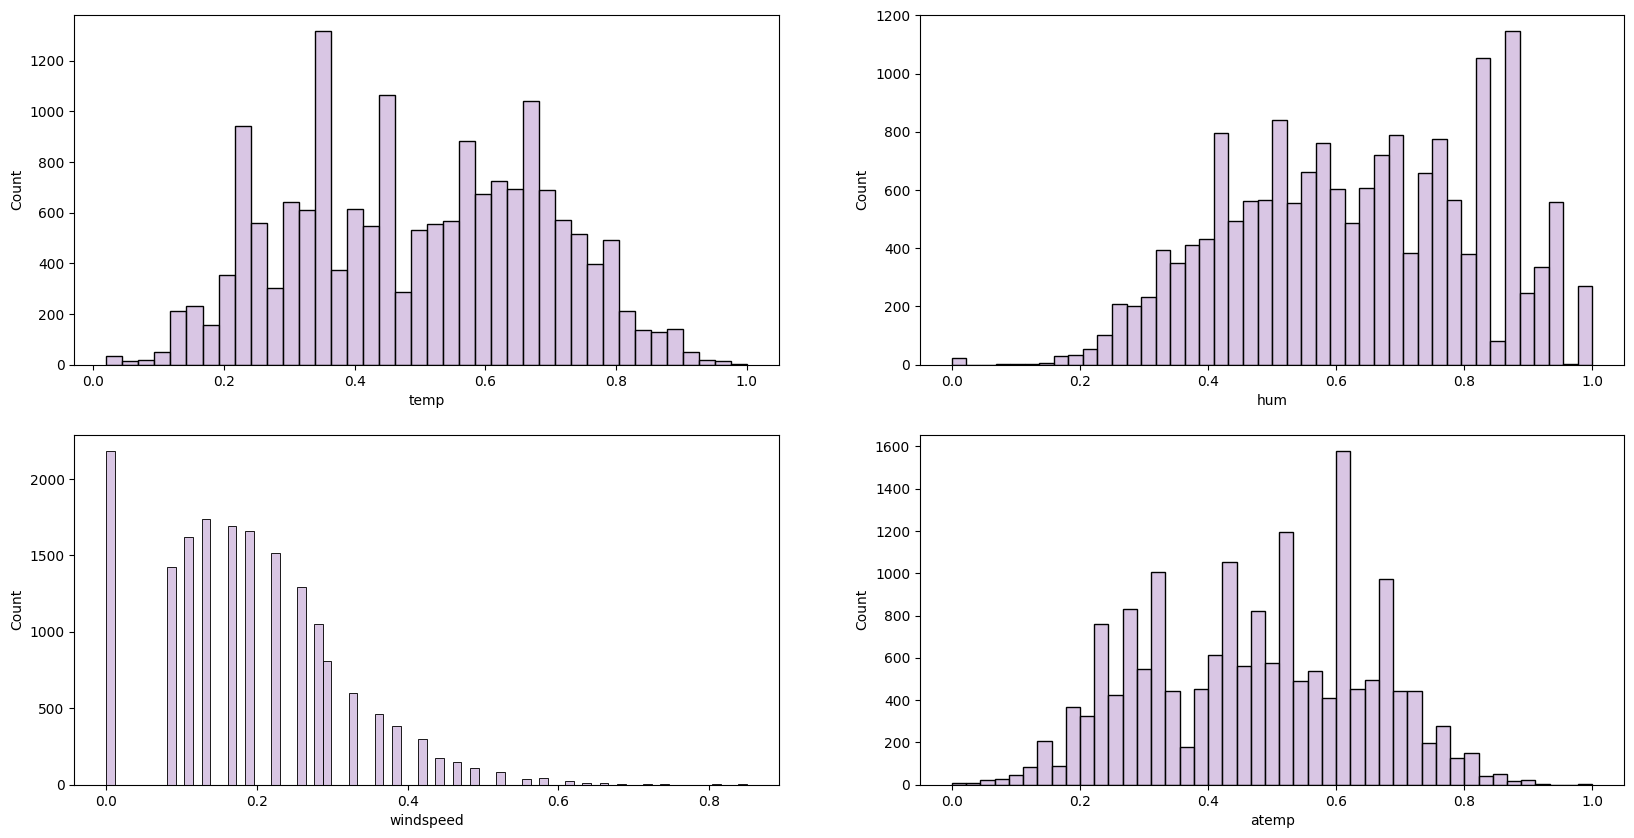

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x=variable,data=data, ax=subplot, color='#cdb4db')

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness:  1.2774116037490577


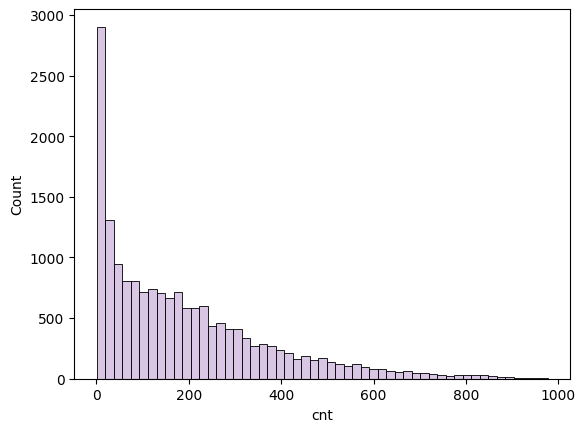

In [16]:
sns.histplot(data['cnt'], color='#cdb4db')
cooficient_skew = data['cnt'].skew()
print("Skewness: ", cooficient_skew)
plt.show()

**Висновки з 8-10 завдання (детальні)**



1.   Ми виділили числові змінні ('temp','hum','windspeed','atemp','cnt') в окремий датасет, для спрощення подальшої роботи.
2.   Побудували графіки розподілу усіх числових змінних. 

temp: Розподіл температури є бімодальним. 

hum: відповідає за записи вологості повітря. Розподіл близький до рівномірного

windspeed: показує швидкість вітру у певні дні. Цей розподіл схожий до експоненційного та має важчий правий хвіст.

atemp: відповідає за те як люди відчували температуру у певні дні. Розподіл мультимодальний.

3.   Графік cnt вказує на кількість викликів швидкої у певні дні. Графік має експоненційний розподіл. Правий хвіст важчий.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

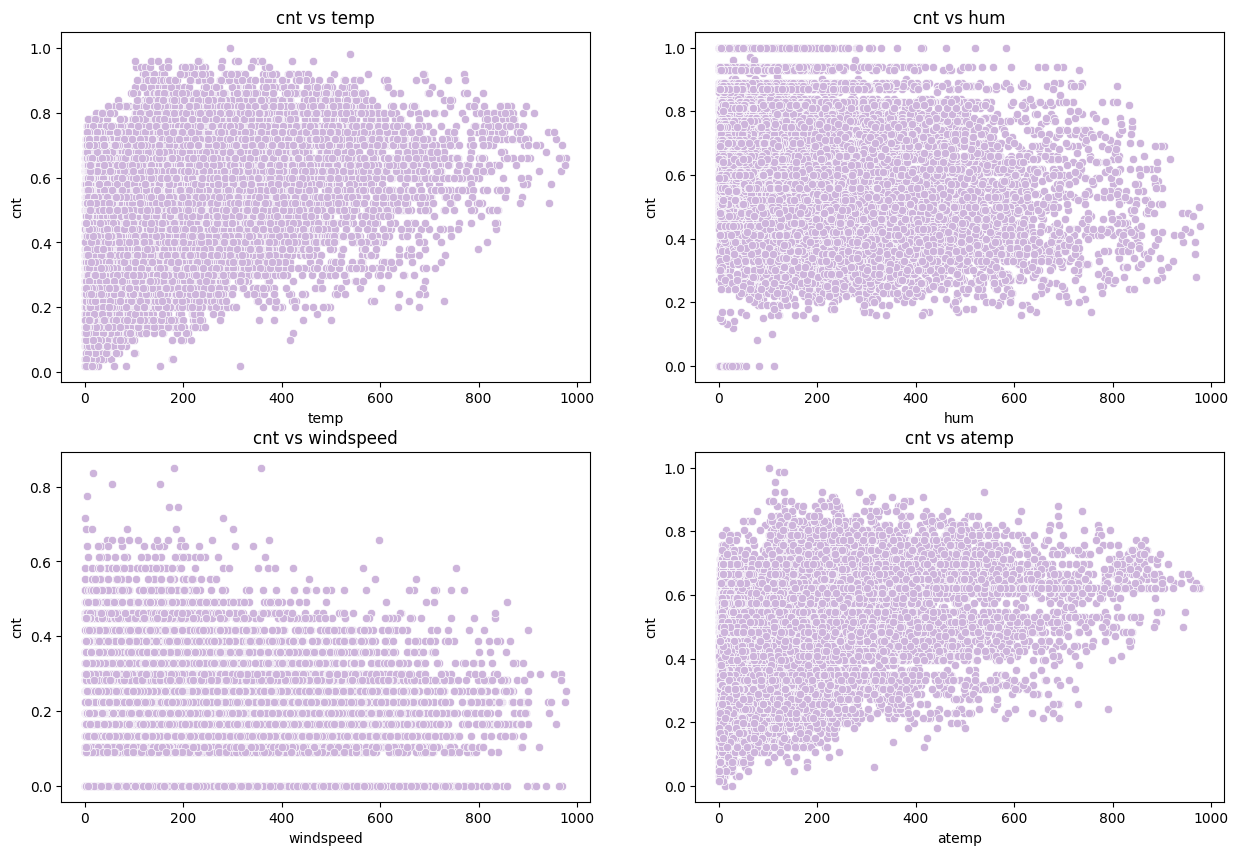

In [17]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x='cnt' , y=var, data=data_numerical , ax= subplot, color='#cdb4db')
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')


plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

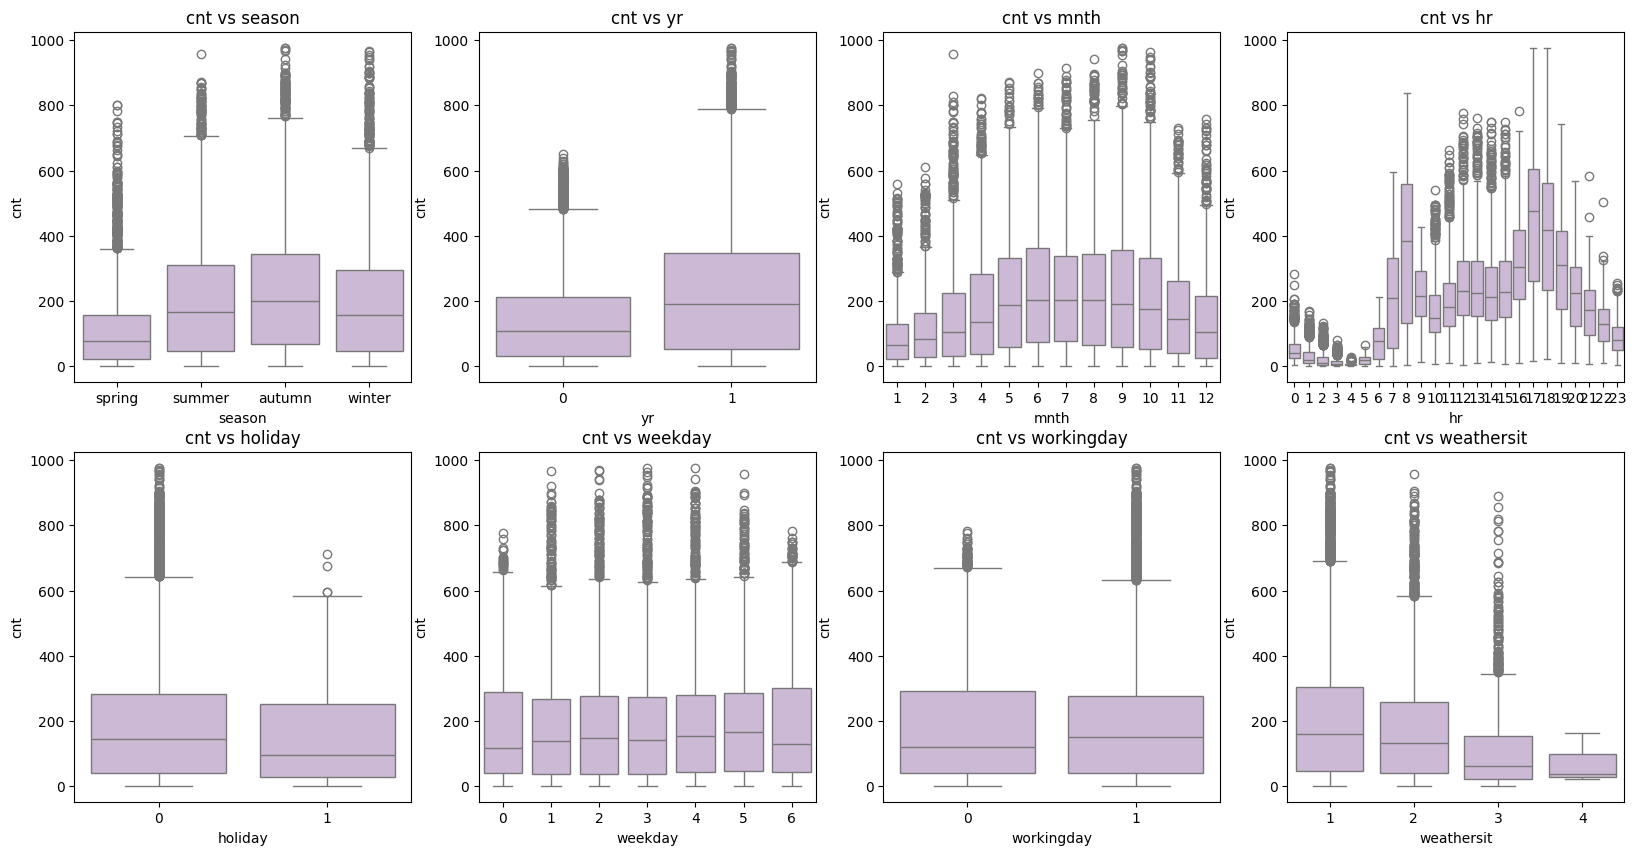

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=var , y= 'cnt', data=data , ax= subplot, color='#cdb4db')
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Висновки з 11-12 завдання (детальні)**



1.    Ми бачимо звязок між cnt i temp (чим вища температура тим більше викликів). Це значить що матоциклісти більше їздять коли тепло.

також є звязок між cnt i windspeed (якщо вітру немає або він помірний, то більше викликів було здійснено). Це значить що мотоциклісти більше їздять у не вітряну або не дуже вітряну погоду.

2.   За боксплотами ми бачимо ще все +- як і має бути. 

Літо і осінь мають більше записів бо в той період більш нормальні погодні умови для мотоциклістів.

Найбільше викликів здійснюється у 8 годині ранку на 17-18 годині вечора. У цей час люди їздять на роботу та з роботи відповідно.




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

temp         0.404772
hum         -0.322911
windspeed    0.093234
Name: cnt, dtype: float64

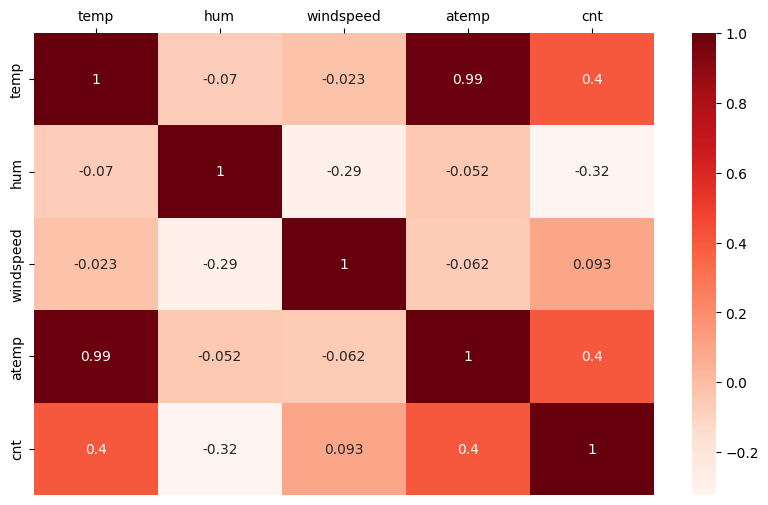

In [19]:
corr_coefficients_pearson = data_numerical.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients_pearson, annot=True, cmap='Reds', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()

display(corr_coefficients_pearson["cnt"].head(3))

temp         0.423330
hum         -0.359614
windspeed    0.126629
Name: cnt, dtype: float64

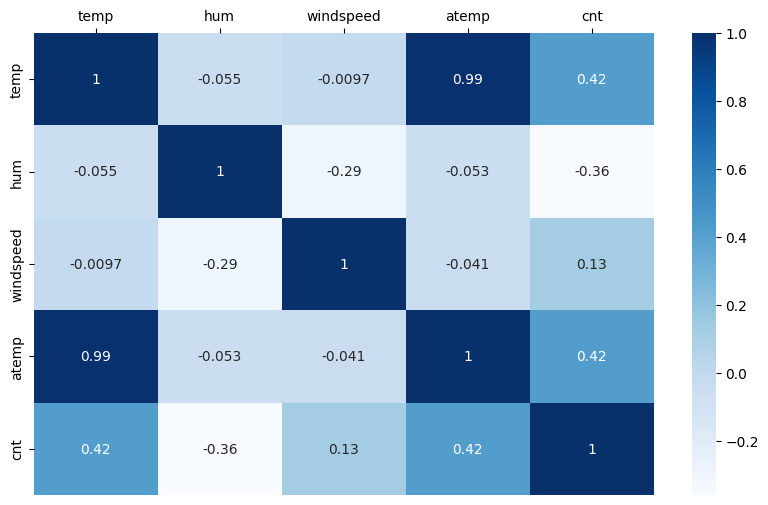

In [20]:
corr_coefficients_spearman = data_numerical.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients_spearman, annot=True, cmap='Blues', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()

display(corr_coefficients_spearman["cnt"].head(3))

1. Метод Пірсона використовується, коли ми хочемо побачити, наскільки сильно дві речі залежать одна від одної. Він говорить про те, чи змінюється одна річ, коли змінюється інша, і наскільки сильно. Результатом може бути число від -1 до 1, де -1 означає, що зв'язок зворотний (одна річ зростає, інша падає), 1 означає, що зв'язок прямий (обидві речі зростають разом), і 0 означає, що зв'язку немає.

2. Метод Спірмена також вимірює зв'язок, але він робить це іншим способом. Він не робить припущень про те, як саме пов'язані речі. Замість цього він дивиться на те, як змінюються ранги або порядки речей. Це означає, що він може виявляти будь-який тип зв'язку, незалежно від того, чи він лінійний, чи ні.

Зробивши кореляції ми бачимо звязки між 'temp і cnt', 'atemp і cnt' та 'hum і cnt'. Числа доволі схожі як і в методі Пірсона так і в методі Спірмена.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [21]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season'], prefix='season'),
                      pd.get_dummies(df['yr'], prefix='yr'),
                      pd.get_dummies(df['mnth'], prefix='mnth'),
                      pd.get_dummies(df['hr'], prefix='hr'),
                      pd.get_dummies(df['holiday'], prefix='holiday'),
                      pd.get_dummies(df['weekday'], prefix='weekday'),
                      pd.get_dummies(df['workingday'], prefix='workingday'),
                      pd.get_dummies(df['weathersit'], prefix='weathersit'),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'yr',
                            'mnth', 
                            'hr',
                            'holiday',
                            'weekday', 
                            'workingday',
                            'weathersit',
                            ], axis = 1)
  return features

In [22]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [23]:
import pandas as pd

data['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)

features = features.drop('hr', axis=1, errors='ignore')

data = data.drop('hr', axis=1)

print(features.head())
print(data.head())


   index       date  temp   atemp   hum  windspeed  cnt  season_autumn  \
0      1 2011-01-01  0.24  0.2879  0.81        0.0   16          False   
1      2 2011-01-01  0.22  0.2727  0.80        0.0   40          False   
2      3 2011-01-01  0.22  0.2727  0.80        0.0   32          False   
3      4 2011-01-01  0.24  0.2879  0.75        0.0   13          False   
4      5 2011-01-01  0.24  0.2879  0.75        0.0    1          False   

   season_spring  season_summer  ...  weekday_3  weekday_4  weekday_5  \
0           True          False  ...      False      False      False   
1           True          False  ...      False      False      False   
2           True          False  ...      False      False      False   
3           True          False  ...      False      False      False   
4           True          False  ...      False      False      False   

   weekday_6  workingday_0  workingday_1  weathersit_1  weathersit_2  \
0       True          True         False    

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [24]:
features_lr = features.drop(['season_spring', 'yr_1', 'mnth_4', 'hr_0', 'holiday_0', 'weekday_0', 'workingday_1', 'weathersit_1', 'atemp', 'date'], axis = 1)


In [25]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis="columns")
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [27]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [30]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

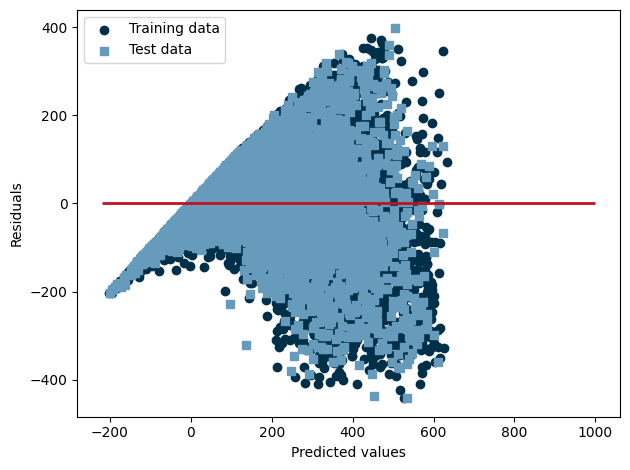

In [29]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#003049', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#669bbc', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#c1121f')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   Ми обудували графік взаємозв'язку між залишками моделі та передбачуваними значеннями. Наша лінійна регресія працює.

2.   Наша модель буде давати правильну оцінку у 69% випадків. Це можна побачити після обчислення R^2 train, який у нас становить 0.688.

3.   Атрибути дати і відносної температури ми видалили тому що вони не є потрібними для нашої моделі. Відносна температура це суб'єктивний показник, який не впливає ні на що.

4. Дані мають нелінійний звязок і з графіку ми можем побачити що між ними є похибка.

